# What this file does

Looks at facility level data provided by Health and Human Services to assess hospital capacity. Skip to the "Formulae" section to see results.

In [53]:
import pandas as pd

# Tools

In [54]:
df = pd.read_csv('reported_hospital_capacity_admissions_facility_level_weekly_average_timeseries_20201221_0.csv')

In [55]:
#columns;pediatric estimates seem to be negative (suppressed?)

In [56]:
df.columns

Index(['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       'is_metro_micro', 'total_beds_7_day_avg',
       'all_adult_hospital_beds_7_day_avg',
       'all_adult_hospital_inpatient_beds_7_day_avg',
       'inpatient_beds_used_7_day_avg',
       'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
       'inpatient_beds_7_day_avg', 'total_icu_beds_7_day_avg',
       'total_staffed_adult_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg',
       'staffed_adult_icu_bed_occupancy_7_day_avg',
       'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
       'staffed_icu_adult_p

# Filtering

In [57]:
df_ct= df[df['state']=='CT']

In [58]:
df['collection_week'] =pd.to_datetime(df['collection_week'])

This date marks the start of the collection week

In [59]:
df_ct['collection_week'].max()

'2020-12-11'

In [60]:
df_ct[df_ct['collection_week'] == df_ct['collection_week'].max()]['city'].unique()

array(['GREENWICH', 'NORWALK', 'BRIDGEPORT', 'DANBURY', 'STAMFORD',
       'BRISTOL', 'NEW BRITAIN', 'FARMINGTON', 'HARTFORD', 'MANCHESTER',
       'TORRINGTON', 'SHARON', 'MIDDLETOWN', 'NEW HAVEN', 'WATERBURY',
       'MERIDEN', 'BRANFORD', 'WALLINGFORD', 'DERBY', 'NEW LONDON',
       'NORWICH', 'STAFFORD SPRINGS', 'ROCKVILLE', 'PUTNAM',
       'WILLIMANTIC'], dtype=object)

In [61]:
df_latest = df_ct[df_ct['collection_week'] == df_ct['collection_week'].max()]

In [62]:
#comparing with CHA list:
 # HOSPITAL FOR SPECIAL CARE, GAYLORD HOSPITAL INC and CONNECTICUT HOSPICE INC,THE don't feature in their list of acute hospitals

In [63]:
df_latest['hospital_name'].unique()

array(['GREENWICH HOSPITAL ASSOCIATION -', 'NORWALK HOSPITAL',
       "ST VINCENT'S MEDICAL CENTER", 'DANBURY HOSPITAL',
       'STAMFORD HOSPITAL', 'BRIDGEPORT HOSPITAL', 'BRISTOL HOSPITAL',
       'HOSPITAL OF CENTRAL CONNECTICUT, THE', 'JOHN DEMPSEY HOSPITAL',
       'CONNECTICUT CHILDRENS MEDICAL CENTER',
       'MANCHESTER MEMORIAL HOSPITAL',
       'ST FRANCIS HOSPITAL & MEDICAL CENTER',
       'HOSPITAL FOR SPECIAL CARE', 'HARTFORD HOSPITAL',
       'CHARLOTTE HUNGERFORD HOSPITAL', 'SHARON HOSPITAL',
       'MIDDLESEX HOSPITAL', 'YALE-NEW HAVEN HOSPITAL',
       'WATERBURY HOSPITAL', "SAINT MARY'S HOSPITAL",
       'MIDSTATE MEDICAL CENTER', 'CONNECTICUT HOSPICE INC,THE',
       'GAYLORD HOSPITAL INC', 'GRIFFIN HOSPITAL',
       'LAWRENCE & MEMORIAL HOSPITAL', 'WILLIAM W BACKUS HOSPITAL',
       'JOHNSON MEMORIAL HOSPITAL', 'ROCKVILLE GENERAL HOSPITAL',
       'DAY KIMBALL HOSPITAL', 'WINDHAM COMM MEM HOSP & HATCH HOSP'],
      dtype=object)

In [64]:
df_latest['city'].value_counts()

HARTFORD            3
WATERBURY           2
BRIDGEPORT          2
NEW BRITAIN         2
PUTNAM              1
TORRINGTON          1
MANCHESTER          1
GREENWICH           1
SHARON              1
NORWALK             1
BRISTOL             1
MIDDLETOWN          1
STAMFORD            1
WALLINGFORD         1
ROCKVILLE           1
MERIDEN             1
FARMINGTON          1
DANBURY             1
BRANFORD            1
NEW HAVEN           1
NORWICH             1
NEW LONDON          1
WILLIMANTIC         1
STAFFORD SPRINGS    1
DERBY               1
Name: city, dtype: int64

# Formulae to calculate hospital capacity

GitHub documentation of dataset; negative values indicate suppressed values
https://github.com/CareSet/COVID_Hospital_PUF?src=hd

Where HHS results may differ from CHA values:
- using 7 day averages for all numbers, not daily (dataset updated once a week) 
- different ways of handling missing values; numbers reported to HHSdaily and aggregated over the week; discrepancies may arise if a hospital misses a day of reporting, say.
- using staffed, adult beds in ICU nummbers
- inpatient beds do not make a distinction between adult and staffed in the same way 
- definition of a bed 
- three facilities in this dataset do not appear in CHA's list

In [65]:
def calculate_hosp_icu_capacity(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['staffed_adult_icu_bed_occupancy_7_day_avg']/df_latest[df_latest['hospital_name'] == hosp]['total_staffed_adult_icu_beds_7_day_avg']).values[0]

In [66]:
def calculate_hosp_icus(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['total_staffed_adult_icu_beds_7_day_avg']).values[0]

In [67]:
def calculate_hosp_inpatient_capacity(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['inpatient_beds_used_7_day_avg']/df_latest[df_latest['hospital_name'] == hosp]['inpatient_beds_7_day_avg']).values[0]

In [68]:
def calculate_all_beds_avg(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['all_adult_hospital_beds_7_day_avg']).values[0]

In [69]:
def calculate_hosp_inpatient_beds(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['total_beds_7_day_avg']).values[0]

In [70]:
def calculate_pct_covid(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg']).values[0]/pd.Series(df_latest[df_latest['hospital_name'] == hosp]['all_adult_hospital_beds_7_day_avg']).values[0]

In [71]:
def city(hosp):
    return pd.Series(df_latest[df_latest['hospital_name'] == hosp]['city']).values[0]

In [72]:
calculate_hosp_icu_capacity('STAMFORD HOSPITAL')

0.771875

In [73]:
calculate_hosp_inpatient_capacity('STAMFORD HOSPITAL')

0.8974025974025974

In [117]:
list_hosp_capacity = []
for hosp in list(df_latest['hospital_name'].unique()):
    dict_hosp = {}
    dict_hosp['name']= hosp
    dict_hosp['city']= city(hosp)
    dict_hosp['% Adult, Staffed ICUs Occupied'] = round(100*calculate_hosp_icu_capacity(hosp),2)
    dict_hosp['% Inpatient beds used'] = round(100*calculate_hosp_inpatient_capacity(hosp),2)
    dict_hosp['ICUs Total'] = calculate_hosp_icus(hosp)
    dict_hosp['Inpatient beds Total'] = calculate_hosp_inpatient_beds(hosp)
#     dict_hosp['Pct_beds_covid'] = calculate_pct_covid(hosp)
#     dict_hosp['all_beds_avg'] = calculate_all_beds_avg(hosp)

    list_hosp_capacity += [dict_hosp]


In [75]:
#notes on data: negative values indicate suppressed numbers; percentages may exceed 100 if a hospital is operating above capacity
#

In [120]:
pd.DataFrame(list_hosp_capacity).to_clipboard()

In [121]:
pd.DataFrame(list_hosp_capacity)

,name,city,"% Adult, Staffed ICUs Occupied",% Inpatient beds used,ICUs Total,Inpatient beds Total
0,GREENWICH HOSPITAL ASSOCIATION -,GREENWICH,27.00,75.32,30.0,205.0
1,NORWALK HOSPITAL,NORWALK,50.42,64.28,24.0,236.0
2,ST VINCENT'S MEDICAL CENTER,BRIDGEPORT,21.36,72.08,66.0,249.3
3,DANBURY HOSPITAL,DANBURY,74.48,74.75,28.6,339.0
4,STAMFORD HOSPITAL,STAMFORD,77.19,89.74,32.0,268.0
5,BRIDGEPORT HOSPITAL,BRIDGEPORT,83.28,50.38,58.0,762.0
6,BRISTOL HOSPITAL,BRISTOL,83.57,70.37,14.0,134.0
7,"HOSPITAL OF CENTRAL CONNECTICUT, THE",NEW BRITAIN,50.91,78.20,55.0,284.0
8,JOHN DEMPSEY HOSPITAL,FARMINGTON,55.71,66.86,28.0,234.0
9,CONNECTICUT CHILDRENS MEDICAL CENTER,HARTFORD,NaN,70.00,0.0,183.0


Questions:
- Find source of discrepancy with CHA data
- Examine calculations of state-level estimates (https://protect-public.hhs.gov/datasets/state-representative-estimates-for-hospital-utilization/data?geometry=89.569%2C-16.702%2C-96.408%2C72.161&orderBy=state_name)
- Aggregate on city level? Have to figure out how to handle suppressed values
- What's the story here? 
- Further analysis: Dataset includes age breakdowns of COVID patients, need to see how to clean it before I can work with it

In [77]:
df_latest['%_ICU_COVID'] = round(100*df_latest['staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg']/df_latest['total_staffed_adult_icu_beds_7_day_avg'])

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df_latest['%_beds_COVID'] = df_latest['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg']/df_latest['total_beds_7_day_avg']

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
df_latest[['hospital_name','%_ICU_COVID','staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg','total_staffed_adult_icu_beds_7_day_avg','total_beds_7_day_avg','%_beds_COVID']].to_clipboard()

In [79]:
df_latest['staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg']

717   -999999.0
718         5.4
719   -999999.0
720        12.9
721        11.6
722        23.7
723         4.1
724        10.7
725        10.3
726         0.0
727        11.3
728        14.0
729         0.0
730        20.1
731   -999999.0
732   -999999.0
733         9.6
734        63.3
735        14.4
736        14.7
737         7.9
738         0.0
739         0.0
740         5.3
741         4.6
742         7.0
743   -999999.0
744         0.0
745   -999999.0
746         0.0
Name: staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg, dtype: float64

# COVID in CT hospitals

Age breakdowns all suppressed

In [80]:
for column in list(df_latest.columns):
    if 'covid' in column:
        print(column)

total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_adult_patients_hospitalized_confirmed_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg
staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg
staffed_icu_adult_patients_confirmed_covid_7_day_avg
total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
total_adult_patients_hospitalized_confirmed_covid_7_day_sum
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum
staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum
staffed_icu_adult_patients_confirmed_covid_7_day_sum
total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_co

In [81]:
df_covid_by_hosp = df_latest[['hospital_name','city','total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg','total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum']]

In [82]:
df_covid_by_hosp.reset_index()

,index,hospital_name,city,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
0,717,GREENWICH HOSPITAL ASSOCIATION -,GREENWICH,37.6,263.0
1,718,NORWALK HOSPITAL,NORWALK,52.1,365.0
2,719,ST VINCENT'S MEDICAL CENTER,BRIDGEPORT,30.1,211.0
3,720,DANBURY HOSPITAL,DANBURY,73.9,517.0
4,721,STAMFORD HOSPITAL,STAMFORD,37.9,265.0
5,722,BRIDGEPORT HOSPITAL,BRIDGEPORT,121.9,853.0
6,723,BRISTOL HOSPITAL,BRISTOL,15.7,110.0
7,724,"HOSPITAL OF CENTRAL CONNECTICUT, THE",NEW BRITAIN,60.7,425.0
8,725,JOHN DEMPSEY HOSPITAL,FARMINGTON,51.7,362.0
9,726,CONNECTICUT CHILDRENS MEDICAL CENTER,HARTFORD,-999999.0,-999999.0


# Joining with city-level positivity data and population data

Further analysis:
- Correlations between these? Is there a relationship between % positivity and hospital capacity?

In [83]:
df_pop_pos = pd.read_csv('town_rate (5).csv')

In [84]:
df_pop_pos['town'] = df_pop_pos['town'].str.upper()

In [85]:
df_covid_by_hosp.merge(df_pop_pos, left_on='city', right_on='town')

,hospital_name,city,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,Unnamed: 0,town_no,town,pop,casesweek1,casesweek2,totalcases,caserate,ratecategory,totaltests,percentpositive,reportperiodstartdate,reportperiodenddate,updatedate
0,GREENWICH HOSPITAL ASSOCIATION -,GREENWICH,37.6,263.0,56,57,GREENWICH,62727,135,154,289,32.9,"4. 15 or more cases per 100,000",6344,5.2,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
1,NORWALK HOSPITAL,NORWALK,52.1,365.0,102,103,NORWALK,89047,326,434,760,61.0,"4. 15 or more cases per 100,000",9997,9.5,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
2,ST VINCENT'S MEDICAL CENTER,BRIDGEPORT,30.1,211.0,14,15,BRIDGEPORT,144900,728,805,1533,75.6,"4. 15 or more cases per 100,000",15340,12.3,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
3,BRIDGEPORT HOSPITAL,BRIDGEPORT,121.9,853.0,14,15,BRIDGEPORT,144900,728,805,1533,75.6,"4. 15 or more cases per 100,000",15340,12.3,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
4,DANBURY HOSPITAL,DANBURY,73.9,517.0,33,34,DANBURY,84730,513,706,1219,102.8,"4. 15 or more cases per 100,000",10093,14.6,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
5,STAMFORD HOSPITAL,STAMFORD,37.9,265.0,134,135,STAMFORD,129775,543,685,1228,67.6,"4. 15 or more cases per 100,000",14144,10.6,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
6,BRISTOL HOSPITAL,BRISTOL,15.7,110.0,16,17,BRISTOL,60032,195,294,489,58.2,"4. 15 or more cases per 100,000",6826,8.6,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
7,"HOSPITAL OF CENTRAL CONNECTICUT, THE",NEW BRITAIN,60.7,425.0,88,89,NEW BRITAIN,72453,396,545,941,92.8,"4. 15 or more cases per 100,000",9308,12.2,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
8,HOSPITAL FOR SPECIAL CARE,NEW BRITAIN,-999999.0,15.0,88,89,NEW BRITAIN,72453,396,545,941,92.8,"4. 15 or more cases per 100,000",9308,12.2,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10
9,JOHN DEMPSEY HOSPITAL,FARMINGTON,51.7,362.0,51,52,FARMINGTON,25506,48,72,120,33.6,"4. 15 or more cases per 100,000",2806,4.6,2020-11-22T00:00:00.000,2020-12-05T00:00:00.000,2020-12-10


# Hospital analysis

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotli

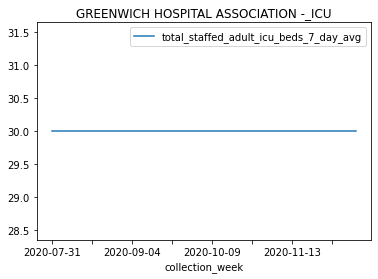

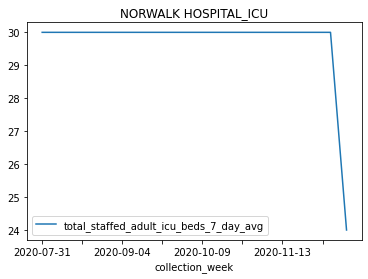

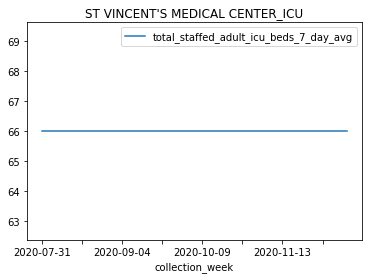

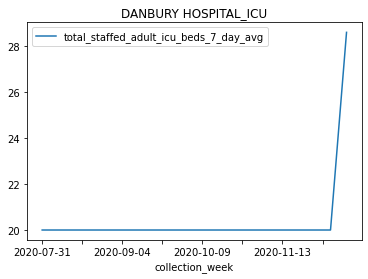

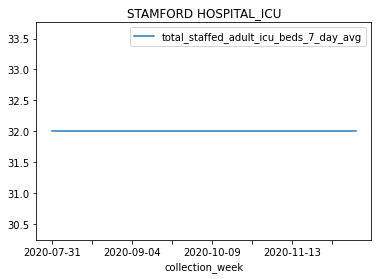

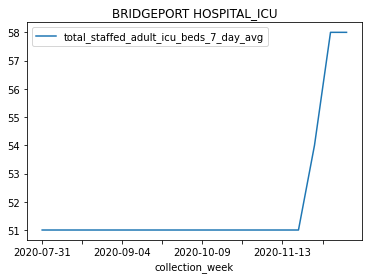

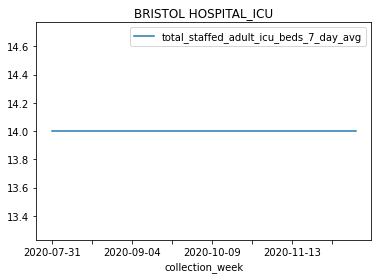

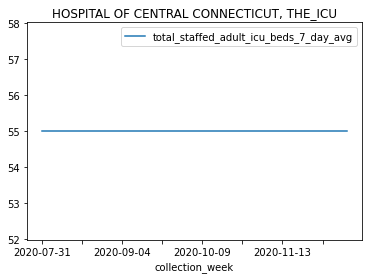

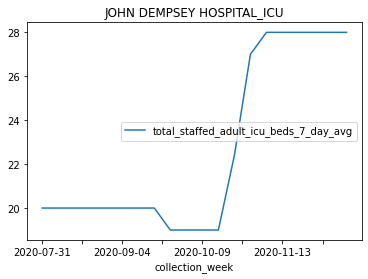

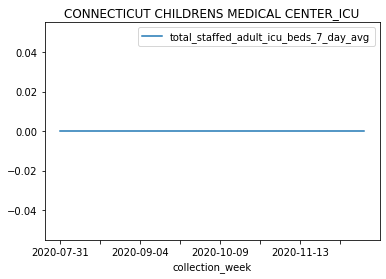

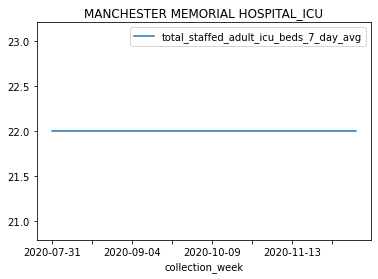

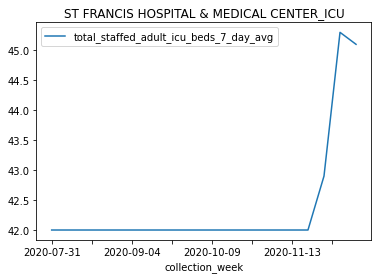

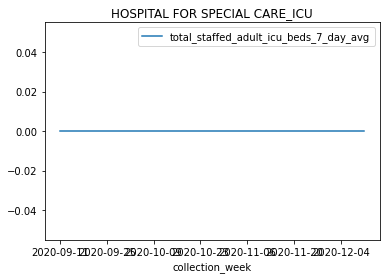

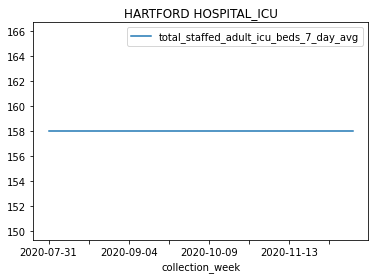

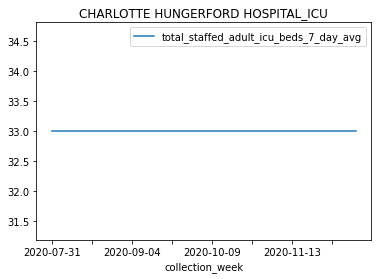

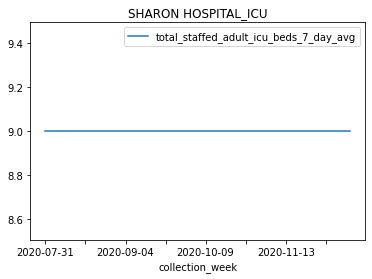

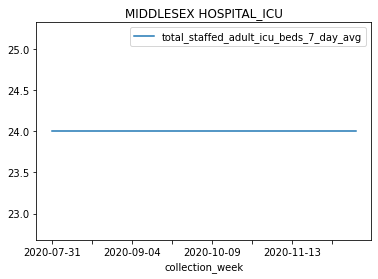

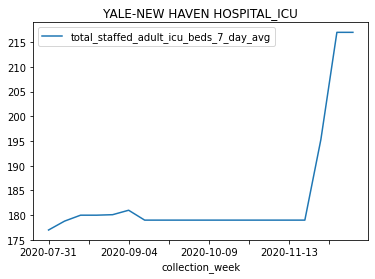

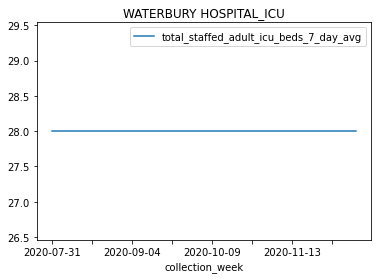

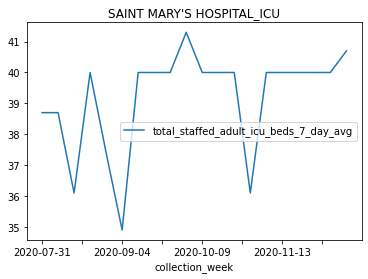

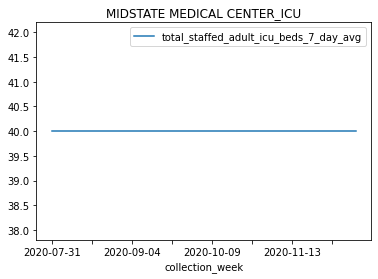

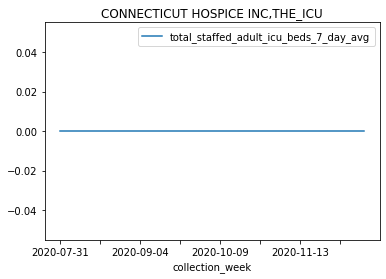

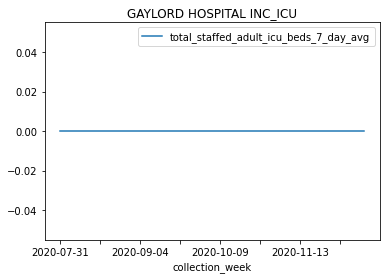

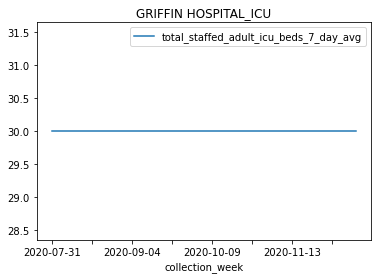

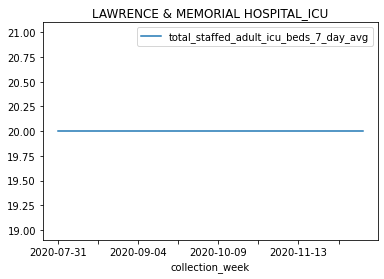

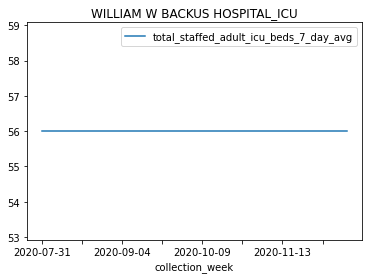

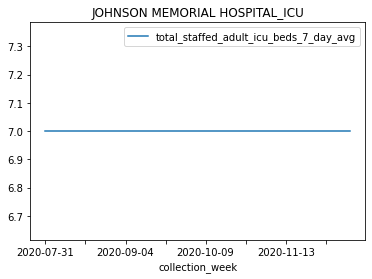

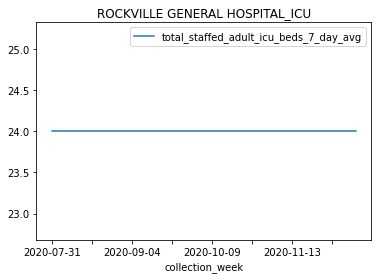

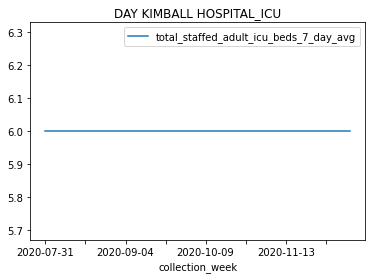

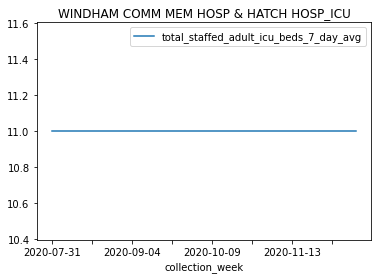

In [86]:
for name in list(df_ct['hospital_name'].unique()):
#     print(name)
    df_mary = df_ct[df_ct['hospital_name'].str.contains(name)]
 #   print('inpatient')
#     ax = df_mary.sort_values(by='collection_week').plot(x='collection_week',y='inpatient_beds_7_day_avg')
#     ax.set_title(f'{name}_inpatient')
  #  print('ICUs')
    ax = df_mary.sort_values(by='collection_week').plot(x='collection_week',y='total_staffed_adult_icu_beds_7_day_avg')
    ax.set_title(f'{name}_ICU')


In [87]:
df_mary = df_ct[df_ct['hospital_name'].str.contains(r'MARY')]

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

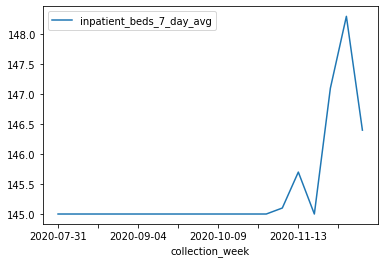

In [88]:
df_mary.sort_values(by='collection_week').plot(x='collection_week',y='inpatient_beds_7_day_avg')

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

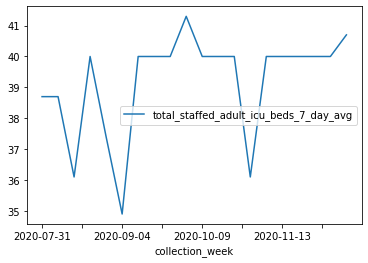

In [89]:
df_mary.sort_values(by='collection_week').plot(x='collection_week',y='total_staffed_adult_icu_beds_7_day_avg')

In [90]:
df_francis = df_ct[df_ct['hospital_name'].str.contains(r'FRANCIS')]

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

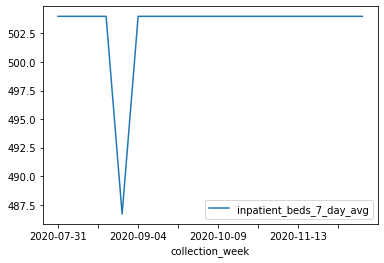

In [91]:
df_francis.sort_values(by='collection_week').plot(x='collection_week',y='inpatient_beds_7_day_avg')

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='collection_week'>

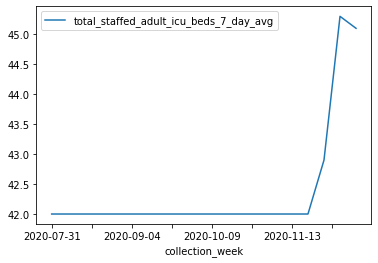

In [92]:
df_francis.sort_values(by='collection_week').plot(x='collection_week',y='total_staffed_adult_icu_beds_7_day_avg')

In [93]:
df_francis['total_staffed_adult_icu_beds_7_day_avg']

728      45.1
5626     45.3
10519    42.9
15409    42.0
20298    42.0
25192    42.0
30073    42.0
34951    42.0
39832    42.0
44703    42.0
49572    42.0
54439    42.0
59296    42.0
64137    42.0
68985    42.0
73834    42.0
78660    42.0
83460    42.0
88242    42.0
93072    42.0
Name: total_staffed_adult_icu_beds_7_day_avg, dtype: float64

In [106]:

df_ct[df_ct['hospital_name'].str.contains('YALE')][['hospital_name','collection_week','total_staffed_adult_icu_beds_7_day_avg']].pivot(index='hospital_name', columns='collection_week',values='total_staffed_adult_icu_beds_7_day_avg').to_clipboard()



In [ ]:
df_ct[df_ct['hospital_name'].str.contains('DANBURY')][['hospital_name','collection_week','total_staffed_adult_icu_beds_7_day_avg']]

In [107]:

df_ct[df_ct['hospital_name'].str.contains('DANBURY')][['hospital_name','collection_week','total_staffed_adult_icu_beds_7_day_avg']].pivot(index='hospital_name', columns='collection_week',values='total_staffed_adult_icu_beds_7_day_avg').to_clipboard()



In [109]:

df_ct[df_ct['hospital_name'].str.contains('BRIDGEPORT')][['hospital_name','collection_week','total_staffed_adult_icu_beds_7_day_avg']].pivot(index='hospital_name', columns='collection_week',values='total_staffed_adult_icu_beds_7_day_avg').to_clipboard()



In [110]:

df_ct[df_ct['hospital_name'].str.contains('FRANCIS')][['hospital_name','collection_week','total_staffed_adult_icu_beds_7_day_avg']].pivot(index='hospital_name', columns='collection_week',values='total_staffed_adult_icu_beds_7_day_avg').to_clipboard()



In [111]:

df_ct[df_ct['hospital_name'].str.contains('DEMPSEY')][['hospital_name','collection_week','total_staffed_adult_icu_beds_7_day_avg']].pivot(index='hospital_name', columns='collection_week',values='total_staffed_adult_icu_beds_7_day_avg').to_clipboard()

